# Understanding Descriptive Statistics

Import the necessary libraries here:

In [12]:
# Libraries
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
import seaborn as sns

## Challenge 1
#### 1.- Define a function that simulates rolling a dice 10 times. Save the information in a dataframe.
**Hint**: you can use the *choices* function from module *random* to help you with the simulation.

In [7]:
# your code here
rolling_dice = []
for i in range(10):
    rolling_dice.append(random.randint(1, 6))

rolling_dice

[3, 4, 3, 3, 3, 1, 5, 5, 3, 6]

In [90]:
# Convert the list in a dataframe
rolling_dice.sort()   # Sort the values
rolling_df = pd.DataFrame({'Rolling': rolling_dice})

In order to keep the exercise unchanged, the generated data are saved in a csv file. And it is loaded to work with it.

In [62]:
rolling_df.to_csv('../data/roling_dice_ten.csv', index=False)

#### 2.- Plot the results sorted by value.

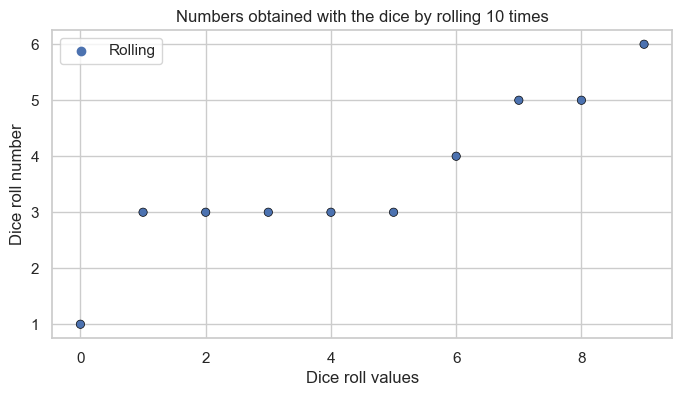

In [135]:
# your code here
rolling_df = pd.read_csv('../data/roling_dice_ten.csv', sep=';')   # Read datafra

def plot_values(df):
    # Create the graphic object
    sns.set(style="whitegrid")   # style must be one of white, dark, whitegrid, darkgrid, ticks
    plt.figure(figsize=(8, 4))

    # Configure the graphic
    sns.scatterplot(df, color='skyblue', edgecolor='black')
    plt.title('Numbers obtained with the dice by rolling 10 times')
    plt.xlabel('Dice roll values')
    plt.ylabel('Dice roll number')
    
plot_values(rolling_df)

#### 3.- Calculate the frequency distribution and plot it. What is the relation between this plot and the plot above? Describe it with words.

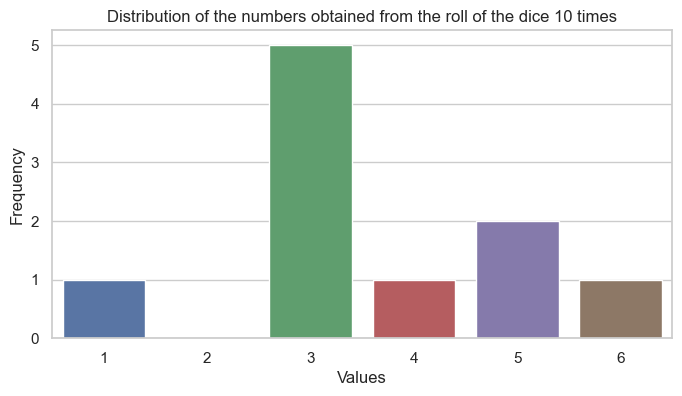

In [150]:
# your code here
def plot_distribution(df, column_name, times):
    # Create panda series with value counts for each number
    class_counts = df[column_name].value_counts()

    # It is possible that some of the die results are not included in this series. Therefore, first create a new series 
    # with all possible values of the die in the series index and with frequency 0. Then, check if any value is not 
    # included and fill it.
    All_values = pd.Series(index=range(1, 7)).fillna(0)
    class_counts_2 = class_counts.reindex(All_values.index, fill_value=0)

    # Create the graphic object
    sns.set(style="whitegrid")   # style must be one of white, dark, whitegrid, darkgrid, ticks
    plt.figure(figsize=(8, 4))

    # Configure the graphic
    sns.barplot(x=class_counts_2.index, y=class_counts_2.values)
    plt.title(f'Distribution of the numbers obtained from the roll of the dice {times} times')
    plt.xlabel('Values')
    plt.ylabel('Frequency')


plot_distribution(rolling_df, 'Rolling', 10)

In [168]:
def plot_hist(df, column_name, times, mean_line):
    sns.histplot(df[column_name], bins='auto', kde=True, color='skyblue')
    
    # Calculate and add the mean line
    if mean_line == True:
        mean_data = mean_df(df, column_name)
        plt.axvline(mean_data, color='red', linestyle='dashed', linewidth=2, label=f'Media = {mean_data:.2f}')
        
    plt.title(f'Distribution of the numbers obtained from the roll of the dice {times} times')
    plt.xlabel('Values')
    plt.ylabel('Frequency')

#plot_hist(rolling_df, 'Rolling', 10, False)

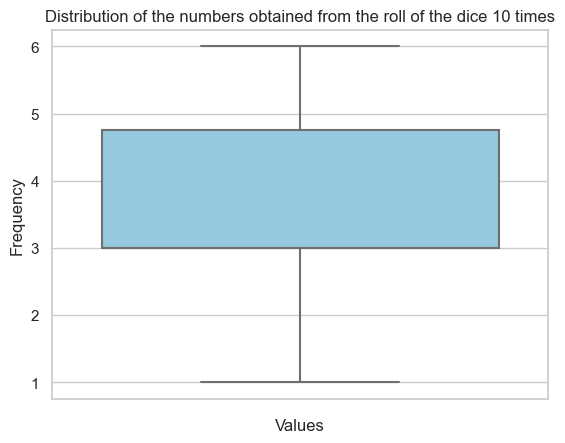

In [164]:
def plot_box(df, column_name, times):
    sns.boxplot(y=df[column_name], color='skyblue')    
    plt.title(f'Distribution of the numbers obtained from the roll of the dice {times} times')
    plt.xlabel('Values')
    plt.ylabel('Frequency')

plot_box(rolling_df, 'Rolling', 10)

In [ ]:
"""
As there are so few rolls, it can happen as in this occasion where the number 3 has been obtained 5 times while the number 
2 has not been obtained at all.
"""

## Challenge 2
Now, using the dice results obtained in *challenge 1*, your are going to define some functions that will help you calculate the mean of your data in two different ways, the median and the four quartiles. 

#### 1.- Define a function that computes the mean by summing all the observations and dividing by the total number of observations. You are not allowed to use any methods or functions that directly calculate the mean value. 

In [126]:
# your code here
# Calculate the mean of the dataframe
# 1: Add the values and divide by the number of elements.
def mean_df(df, column_name):
    mean = sum(df[column_name]) / len(df[column_name])
    print('Calculation of the average without formulas:', mean)
    return mean
mean_df(rolling_df, 'Rolling')

# 2: Using the average formula
mean_way2 = rolling_df['Rolling'].sum() / rolling_df['Rolling'].count()
print('Calculation of the average with formulas:', mean_way2)

Calculation of the average without formulas: 3.6
Calculation of the average with formulas: 3.6


In [111]:
# Calculate the quartiles of the dataframe

def quartiles(df, column_name):
    values = list(df[column_name])

    # Calculate the first quartile (Q1)
    q1_index = int(len(values) * 0.25)
    q1 = values[q1_index]
    print('Q1: ', q1)

    # Calculate the second quartile (Q2)
    q2_index = int(len(values) * 0.5)
    q2 = values[q2_index]
    print('Q2: ', q2)

    # Calculate the third quartile (Q1)
    q3_index = int(len(values) * 0.75)
    q3 = values[q3_index]
    print('Q3: ', q3)

    # Calculate the fourth quartile (Q1)
    q4 = values[-1]
    print('Q4: ', q4)
    
    return q1, q2, q3, q4
    
quartiles(rolling_df, 'Rolling')

Q1:  3
Q2:  3
Q3:  5
Q4:  6


(3, 3, 5, 6)

#### 2.- First, calculate the frequency distribution. Then, calculate the mean using the values of the frequency distribution you've just computed. You are not allowed to use any methods or functions that directly calculate the mean value. 

In [132]:
# your code here
def frequency_calculate(df, column_name):
    # I calculated the frequency distribution below
    class_counts = df[column_name].value_counts()

    # It is possible that some of the die results are not included in this series. Therefore, first create a new series 
    # with all possible values of the die in the series index and with frequency 0. Then, check if any value is not 
    # included and fill it.
    All_values = pd.Series(index=range(1, 7)).fillna(0)
    class_counts_2 = class_counts.reindex(All_values.index, fill_value=0)
    
    return class_counts_2   # This is the frequency distribution

frequency = frequency_calculate(rolling_df, 'Rolling')
print(frequency)

# I think this exercise asks to calculate something like the weighted average, using the frequencies of each value as if 
# they were its weights. This function uses the frequency series, extracts each index and each frequency, multiplies both 
# for each iteration. It then sums all the values and divides it by the sum of frequency.
weighted_mean = sum(value * frequency[value] for value in frequency.index) / sum(frequency)
print(weighted_mean)

1    1
2    0
3    5
4    1
5    2
6    1
Name: count, dtype: int64
3.6


#### 3.- Define a function to calculate the median. You are not allowed to use any methods or functions that directly calculate the median value. 
**Hint**: you might need to define two computation cases depending on the number of observations used to calculate the median.

In [116]:
# your code here
# The median is the same that the Q2 value
median_way1 = q2
print(median_way1)

# I will calculate the median of the data set using the frequency distribution.
def median_freq_distribution(df):
    # Calculate the frequency distribution
    freq_distribution = df['Rolling'].value_counts().sort_index()
    
    # Calculate the value of the dataset middle
    middle_freq = sum(freq_distribution)/2
    
    # Acumullate the sum of frequencies in sum_freq
    sum_freq = 0
    # Extract value and freq to each time
    for value, freq in freq_distribution.items():
        sum_freq += freq
        if sum_freq >= middle_freq:
            return value
    
median_way2 = median_freq_distribution(rolling_df)
print(median_way2)

3
3


#### 4.- Define a function to calculate the four quartiles. You can use the function you defined above to compute the median but you are not allowed to use any methods or functions that directly calculate the quartiles. 

In [117]:
# your code here
def quartiles_freq_distribution(freq_distribution, percentage):
    # Calculate the value of the dataset middle
    q_percentage = int(sum(freq_distribution)*percentage)
    
    # Acumullate the sum of frequencies in sum_freq
    sum_freq = 0
    # Extract value and freq to each time
    for value, freq in freq_distribution.items():
        sum_freq += freq
        if sum_freq >= q_percentage:
            return value

def quartiles_calculation(df):
    # Calculate the frequency distribution
    freq_distribution = df['Rolling'].value_counts().sort_index()

    q1 = quartiles_freq_distribution(freq_distribution, 0.25)
    q2 = quartiles_freq_distribution(freq_distribution, 0.5)
    q3 = quartiles_freq_distribution(freq_distribution, 0.75)
    
    return q1, q2, q3

quartiles_calculation(rolling_df)

(3, 3, 4)

## Challenge 3
Read the csv `roll_the_dice_hundred.csv` from the `data` folder.
#### 1.- Sort the values and plot them. What do you see?

In [123]:
# your code here
rolling_hundred_df = pd.read_csv('../data/roll_the_dice_hundred.csv', sep=',')   # Read dataframe
rolling_hundred_df.head()

,Unnamed: 0,roll,value
0,0,0,1
1,1,1,2
2,2,2,6
3,3,3,1
4,4,4,6


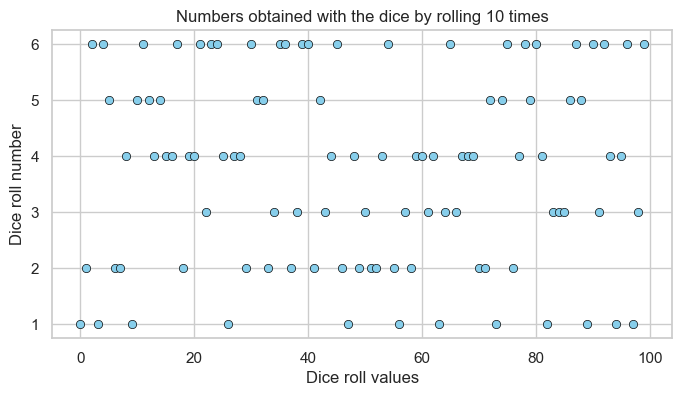

In [136]:
# I will use the function I have created to represent the data in challenge 1
plot_values(rolling_hundred_df['value'])

In [ ]:
"""
It is now much more difficult to draw conclusions from this graph. It does seem that numbers 2, 4 and 6 have come out more 
often than 1, 3 and 5. This graph does not provide much information about this dataset.
"""

#### 2.- Using the functions you defined in *challenge 2*, calculate the mean value of the hundred dice rolls.

In [127]:
# your code here
mean_df(rolling_hundred_df, 'value')

Calculation of the average without formulas: 3.74


3.74

#### 3.- Now, calculate the frequency distribution.


In [133]:
# your code here
frequency_calculate(rolling_hundred_df, 'value')

1    12
2    17
3    14
4    22
5    12
6    23
Name: count, dtype: int64

#### 4.- Plot the histogram. What do you see (shape, values...) ? How can you connect the mean value to the histogram? 

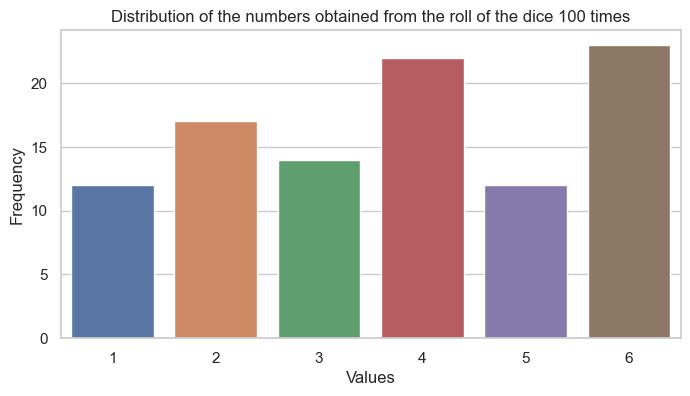

In [151]:
# your code here
# I prefer to represent the data with a bar chart, rather than a histogram, because for this case where there are 6 values,
# I think the graph looks better. And also the result from a functional point of view is the same.
plot_distribution(rolling_hundred_df, 'value', 100)

In [167]:
#plot_hist(rolling_hundred_df, 'value', 100, True)

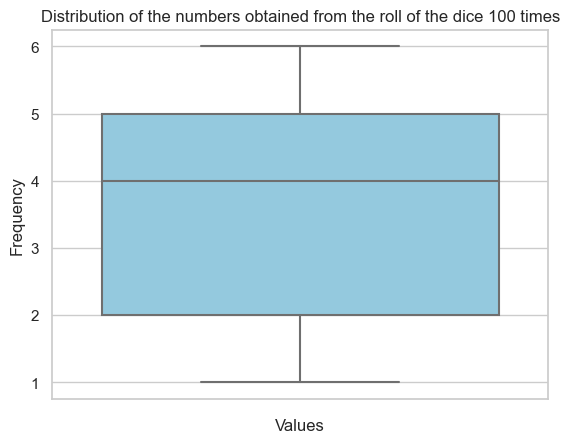

In [165]:
plot_box(rolling_hundred_df, 'value', 100)

In [ ]:
"""
In this exercise the number of times the dice have been thrown is much higher, so the differences tend to decrease. In the 
previous case, out of 10 times the same value came out in half of them. 

The mean value can be related to the distribution. As can be seen, the numbers that have come up most often are 4 and 6, 
so the mean is shifted towards the higher value. Moving away from the median.

Therefore, the mean in this case is higher than in the previous case, where the number 3 (which is the median of that data 
set) came up a greater number of times.
"""

#### 5.- Read the `roll_the_dice_thousand.csv` from the `data` folder. Plot the frequency distribution as you did before. Has anything changed? Why do you think it changed?

In [145]:
# your code here
rolling_thousand_df = pd.read_csv('../data/roll_the_dice_thousand.csv', sep=',')   # Read dataframe
rolling_thousand_df.head()

,Unnamed: 0,roll,value
0,0,0,5
1,1,1,6
2,2,2,1
3,3,3,6
4,4,4,5


In [146]:
# Mean calculation
mean_df(rolling_thousand_df, 'value')

Calculation of the average without formulas: 3.447


3.447

In [148]:
# Frequency data calculation
frequency_calculate(rolling_thousand_df, 'value')

1    175
2    167
3    175
4    168
5    149
6    166
Name: count, dtype: int64

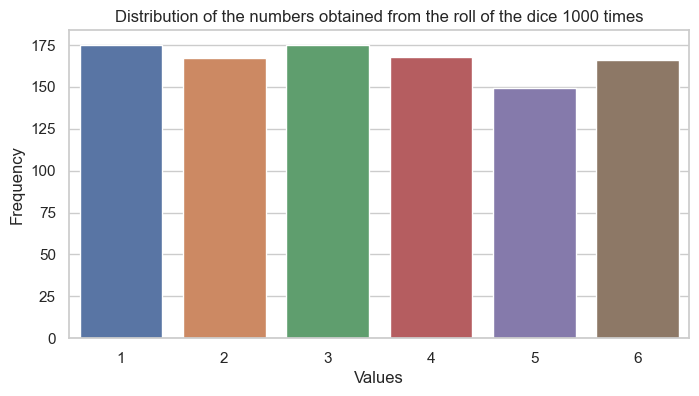

In [152]:
# I prefer to represent the data with a bar chart, rather than a histogram, because for this case where there are 6 values,
# I think the graph looks better. And also the result from a functional point of view is the same.
plot_distribution(rolling_thousand_df, 'value', 1000)

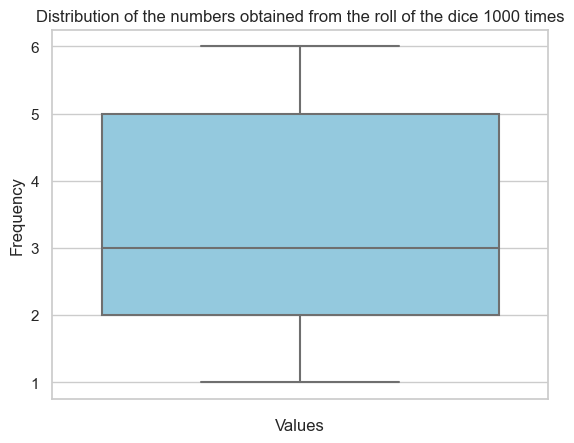

In [166]:
# Use the box plot to observe the distribution of data better than the previous graphic.
plot_box(rolling_thousand_df, 'value', 1000)

In [ ]:
"""
In this exercise the number of times the dice have been thrown is much higher, so the differences tend to decrease. In the 
previous case, out of 10 times the same value came out in half of them. 

The mean value can be related to the distribution. As can be seen, the numbers that have come up most often are 4 and 6, so 
the mean is shifted towards the higher value. Moving away from the median.

Therefore, the mean in this case is higher than in the previous case, where the number 3 (which is the median of that data 
set) came up a greater number of times.
"""

## Challenge 4
In the `data` folder of this repository you will find three different files with the prefix `ages_population`. These files contain information about a poll answered by a thousand people regarding their age. Each file corresponds to the poll answers in different neighbourhoods of Barcelona.

#### 1.- Read the file `ages_population.csv`. Calculate the frequency distribution and plot it as we did during the lesson. Try to guess the range in which the mean and the standard deviation will be by looking at the plot. 

In [194]:
# your code here
ages_population = pd.read_csv('../data/ages_population.csv', sep=',')   # Read dataframe
ages_population.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 1 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   observation  1000 non-null   float64
dtypes: float64(1)
memory usage: 7.9 KB


In [193]:
# Frequency data calculation
frequency_ages = ages_population['observation'].value_counts()#.sort_index()
frequency_ages.info()

<class 'pandas.core.series.Series'>
Index: 72 entries, 39.0 to 69.0
Series name: count
Non-Null Count  Dtype
--------------  -----
72 non-null     int64
dtypes: int64(1)
memory usage: 1.1 KB


Text(0, 0.5, 'Frequency')

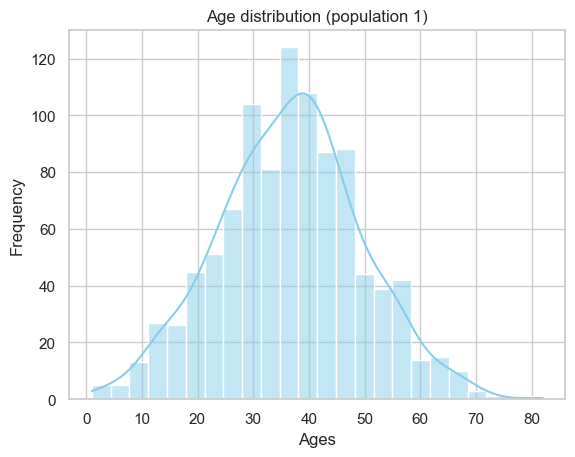

In [189]:
# Plot the histogram of the population data
sns.histplot(ages_population['observation'], bins='auto', kde=True, color='skyblue')        
plt.title('Age distribution (population 1)')
plt.xlabel('Ages')
plt.ylabel('Frequency')

I think the mean is close to 39 looking at the distribution of the data in the graph. On the other hand, the standard deviation I think should be an intermediate value because there is a Gaussian distribution, but they are not all very close to the mean. So I think it will be 20.

#### 2.- Calculate the exact mean and standard deviation and compare them with your guesses. Do they fall inside the ranges you guessed?

In [201]:
# your code here
mean_df = np.mean(ages_population['observation'])
median_df = np.median(ages_population['observation'])
desv_tip_df = np.std(ages_population['observation'])
print('The mean is: ', mean_df)
print('The median is: ', median_df)
print('The standard desviation is: ', desv_tip_df)

The mean is:  36.56
The median is:  37.0
The standard desviation is:  12.81008977329979


In [ ]:
"""
The mean is easier to predict by looking at the graph, but the standard deviation is more complicated.
"""

#### 3.- Now read the file `ages_population2.csv` . Calculate the frequency distribution and plot it.

In [195]:
# your code here
ages_population2 = pd.read_csv('../data/ages_population2.csv', sep=',')   # Read dataframe
ages_population2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 1 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   observation  1000 non-null   float64
dtypes: float64(1)
memory usage: 7.9 KB


In [192]:
# Calculate the frequency
frequency_ages2 = ages_population2['observation'].value_counts()#.sort_index()
frequency_ages2.info()

<class 'pandas.core.series.Series'>
Index: 18 entries, 28.0 to 36.0
Series name: count
Non-Null Count  Dtype
--------------  -----
18 non-null     int64
dtypes: int64(1)
memory usage: 288.0 bytes


Text(0, 0.5, 'Frequency')

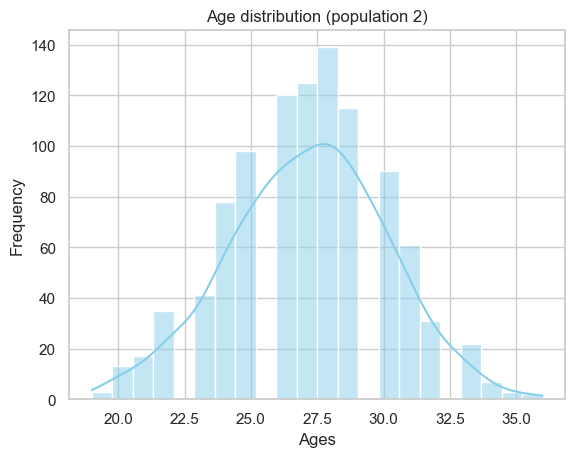

In [196]:
# Plot the distribution
sns.histplot(ages_population2['observation'], bins='auto', kde=True, color='skyblue')        
plt.title('Age distribution (population 2)')
plt.xlabel('Ages')
plt.ylabel('Frequency')

####  4.- What do you see? Is there any difference with the frequency distribution in step 1?

In [ ]:
"""
The dataset has 1000 records, but in this case only 18 age values are repeated, while in the first one 72 were repeated, so 
there is less variability in the data.

In the second graph it can be seen how there are bins that don't have any data. The distribution is similar to the previous 
one, a Gaussian bell, but in this case it's centered on smaller values around 27. And in this case, the standard desviation 
will be smaller than the first population.
"""

#### 5.- Calculate the mean and standard deviation. Compare the results with the mean and standard deviation in step 2. What do you think?

In [202]:
# your code here
mean_df2 = np.mean(ages_population2['observation'])
median_df2 = np.median(ages_population2['observation'])
desv_tip_df2 = np.std(ages_population2['observation'])
print('The mean is: ', mean_df2)
print('The median is: ', median_df2)
print('The standard desviation is: ', desv_tip_df2)

The mean is:  27.155
The median is:  27.0
The standard desviation is:  2.9683286543103704


In [ ]:
"""
Since the frequency of the values close to the mean is clearly higher than the rest of the values, plus there are bins with 
no data, it makes sense that the standard deviation in this case is very low, since the distribution of the data in general
is close to the mean.

As in population 1, the mean and median are close to each other.
"""

## Challenge 5
Now is the turn of `ages_population3.csv`.

#### 1.- Read the file `ages_population3.csv`. Calculate the frequency distribution and plot it.

In [203]:
# your code here
ages_population3 = pd.read_csv('../data/ages_population3.csv', sep=',')   # Read dataframe
ages_population3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 1 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   observation  1000 non-null   float64
dtypes: float64(1)
memory usage: 7.9 KB


In [206]:
# Calculate the frequency
frequency_ages3 = ages_population3['observation'].value_counts()#.sort_index()
frequency_ages3.info()

<class 'pandas.core.series.Series'>
Index: 75 entries, 32.0 to 7.0
Series name: count
Non-Null Count  Dtype
--------------  -----
75 non-null     int64
dtypes: int64(1)
memory usage: 1.2 KB


Text(0, 0.5, 'Frequency')

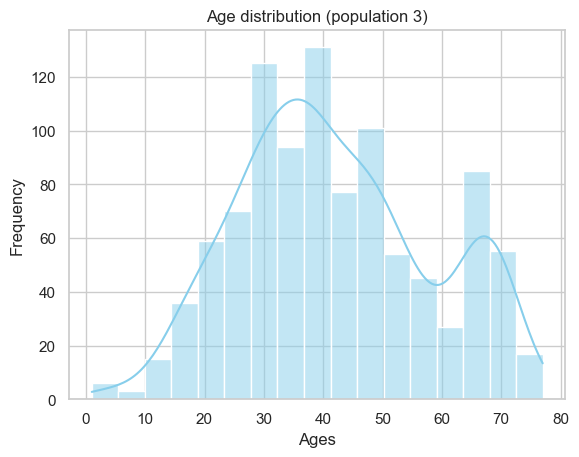

In [207]:
# Plot the distribution
sns.histplot(ages_population3['observation'], bins='auto', kde=True, color='skyblue')        
plt.title('Age distribution (population 3)')
plt.xlabel('Ages')
plt.ylabel('Frequency')

#### 2.- Calculate the mean and standard deviation. Compare the results with the plot in step 1. What is happening?

In [208]:
# your code here
mean_df3 = np.mean(ages_population3['observation'])
median_df3 = np.median(ages_population3['observation'])
desv_tip_df3 = np.std(ages_population3['observation'])
print('The mean is: ', mean_df3)
print('The median is: ', median_df3)
print('The standard desviation is: ', desv_tip_df3)

The mean is:  41.989
The median is:  40.0
The standard desviation is:  16.136631587788084


In [ ]:
"""
In population 3, the distribution of data is much more heterogeneous. It could be intuited that the mean is somewhat higher
than 40, but it was more difficult. 
It makes sense that the standard deviation is the largest of the 3 examples, since the data are less close to the mean. 
"""

#### 3.- Calculate the four quartiles. Use the results to explain your reasoning for question in step 2. How much of a difference is there between the median and the mean?

In [209]:
# your code here
q1_p3 = np.percentile(ages_population3['observation'], 25)
q2_p3 = np.percentile(ages_population3['observation'], 50)
q3_p3 = np.percentile(ages_population3['observation'], 75)
q4_p3 = np.percentile(ages_population3['observation'], 100)
iqr_p3 = q3_p3 - q1_p3

print('The 4 quartiles are: \n q1=', q1_p3, '\n q2=', q2_p3, '\n q3=', q3_p3, '\n q4=', q4_p3, '\n The iqr is: ', iqr_p3)

The 4 quartiles are: 
 q1= 30.0 
 q2= 40.0 
 q3= 53.0 
 q4= 77.0 
 The iqr is:  23.0


In [ ]:
"""
The median is equal to the value of q2 and they are close values. Although it makes sense that for population 3, the 
difference between mean and median is greater than for the rest of the populations, because it is a dataset with greater 
dispersion.
"""

#### 4.- Calculate other percentiles that might be useful to give more arguments to your reasoning.

In [210]:
# your code here
q1_p2 = np.percentile(ages_population2['observation'], 25)
q2_p2 = np.percentile(ages_population2['observation'], 50)
q3_p2 = np.percentile(ages_population2['observation'], 75)
q4_p2 = np.percentile(ages_population2['observation'], 100)
iqr_p2 = q3_p2 - q1_p2

print('The 4 quartiles are: \n q1=', q1_p2, '\n q2=', q2_p2, '\n q3=', q3_p2, '\n q4=', q4_p2, '\n The iqr is: ', iqr_p2)

The 4 quartiles are: 
 q1= 25.0 
 q2= 27.0 
 q3= 29.0 
 q4= 36.0 
 The iqr is:  4.0


In [ ]:
"""
In this case, the difference between quartiles is much smaller and the iqr is very small compared to that of population 3. 

Comparing the quartiles obtained for population 2 with those for population 3, it is clear that the distribution of the 
data in population 2 is much more centered around the mean than for population 3. 
"""

In [226]:
# Before starting to work with the three populations, it remains to calculate the quartiles of the population corresponding
# to neighborhood 1:
q1_p1 = np.percentile(ages_population['observation'], 25)
q2_p1 = np.percentile(ages_population['observation'], 50)
q3_p1 = np.percentile(ages_population['observation'], 75)
q4_p1 = np.percentile(ages_population['observation'], 100)
iqr_p1 = q3_p1 - q1_p1

print('The 4 quartiles are: \n q1=', q1_p1, '\n q2=', q2_p1, '\n q3=', q3_p1, '\n q4=', q4_p1, '\n The iqr is: ', iqr_p1)

The 4 quartiles are: 
 q1= 28.0 
 q2= 37.0 
 q3= 45.0 
 q4= 82.0 
 The iqr is:  17.0


## Bonus challenge
Compare the information about the three neighbourhoods. Prepare a report about the three of them. Remember to find out which are their similarities and their differences backing your arguments in basic statistics.

In [214]:
# your code here
# Create new dataframe with 3 population datasets
neighbourhoods_df = pd.concat([ages_population, ages_population2, ages_population3], axis=1)
# Rename the column names
neighbourhoods_df.columns = ['neighbourhood_1', 'neighbourhood_2', 'neighbourhood_3']
neighbourhoods_df.head()

,neighbourhood_1,neighbourhood_2,neighbourhood_3
0,68.0,25.0,21.0
1,12.0,31.0,21.0
2,45.0,29.0,24.0
3,38.0,31.0,31.0
4,49.0,29.0,54.0


Text(0, 0.5, 'Ages')

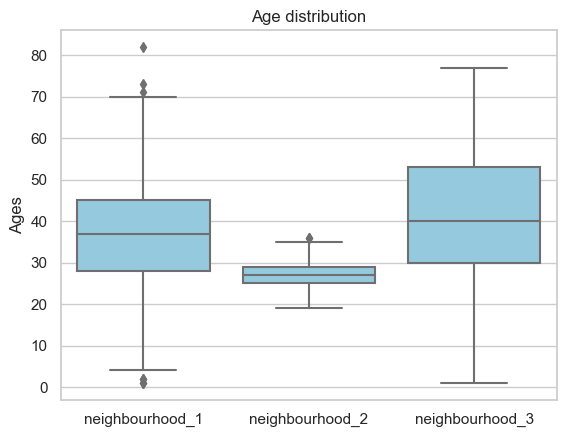

In [216]:
# Use box plot to show the comparation between three neighbourhoods.
sns.boxplot(data=neighbourhoods_df, color='skyblue')    
plt.title('Age distribution')
plt.ylabel('Ages')

In [ ]:
"""
Neighborhood 2 is the youngest of the three, its mean is the lowest of the three. In addition, the age distribution is much
smaller, since its iqr=4 and the difference between the oldest and youngest ages is 17 years.

Neighborhood 1 and 3 have greater similarity. The mean age is very similar in both cases, but in the first one the 
distribution is more homogeneous and closer to the mean than in the third one. This can be seen in the size of the boxes 
corresponding to the two neighborhoods, as in the previous graphs.

Despite this, neighborhood 3 is the only one with no outlier. Although its iqr is the highest of the 3 and it is the one 
with the greatest age diversity.
"""